In [1]:
# Chengzhi Dong
# 112890166
# CSE 353 

In [2]:
#!pip install opencv-python
import cv2
import numpy as  np
import matplotlib.pyplot as plt
import os

In [3]:
# function to calculated the motified log normal distribution for comparison
def logNorm(x, mean, sigma, dim):
    base = 0
    exp = 0
    for d in range(dim):
        base += np.log(sigma[d][d])
        exp += np.power(x[d] - mean[d], 2) / sigma[d][d]
    base *= -0.5
    exp *= -0.5
    ans = base + exp
    return ans

In [4]:
### data directory
trainFace = 'trainingData/face'
trainBackground = 'trainingData/background'
trainingFaceImages = os.listdir(trainFace)
trainingBackgroundImages = os.listdir(trainBackground)
testFace = 'testingData/face'
testBackground = 'testingData/background'
testingFaceImages = os.listdir(testFace)
testingBackgroundImages = os.listdir(testBackground)
# D = 20rows x 15cols x 3 RGB = 900 (size of the matrix)
nDim = 900

(-0.5, 14.5, 19.5, -0.5)

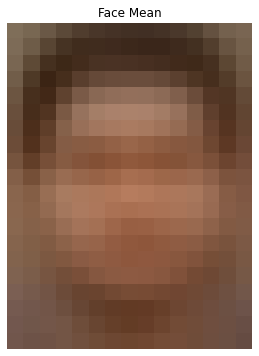

In [5]:
### Calculate the mean for face class
faceMean = np.zeros((nDim, 1)) # 900 x 1 matrix for mean of face class
faceImgCount = 0 # count the number of face images

# loop the images in training face folder
for iFile in trainingFaceImages:
    ### Load the training faces
    faceImgCount += 1
    faceImg = cv2.imread(trainFace+'/'+str(iFile))
    nfrows, nfcols = faceImg.shape[0], faceImg.shape[1]
    for i in range(nfrows):
        for j in range(nfcols):
            # get the BGR values (Opencv) of each pixel of this image
            B = faceImg[i][j][0]
            G = faceImg[i][j][1] 
            R = faceImg[i][j][2]
            
            # store the values in order of RGB in face mean array
            faceMean[(i*nfcols)+j][0] += R
            faceMean[(i*nfcols)+j+(nfrows*nfcols)][0] += G
            faceMean[(i*nfcols)+j+(2*nfrows*nfcols)][0] += B

# divide by number of face image to get the mean
for i in range(nDim):
    faceMean[i][0] /= faceImgCount
    
# Uncomment to print the face mean array
# print(faceMean)

# Convert the face mean array into BGR array for visualization
sample1 = np.zeros((nfrows, nfcols, 3))
for i in range(nfrows):
        for j in range(nfcols):
            sample1[i][j][0] = int(faceMean[(i*nfcols)+j+(2*nfrows*nfcols)][0])
            sample1[i][j][1] = int(faceMean[(i*nfcols)+j+(nfrows*nfcols)][0])
            sample1[i][j][2] = int(faceMean[(i*nfcols)+j][0])

# visualize the face mean
sample1 = sample1.astype(np.uint8)
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(sample1, cv2.COLOR_BGR2RGB))
plt.title('Face Mean')
plt.axis("off")

(-0.5, 14.5, 19.5, -0.5)

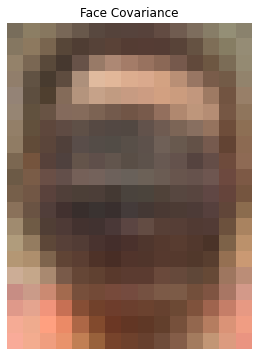

In [6]:
### Calculate the Sigma (covariance matrix) for face class
faceSigma = np.zeros((nDim, nDim)) # 900 x 900 matrix Sigma of face class
faceImgCount = 0 # count number of face images

# loop the images in training face folder
for iFile in trainingFaceImages:
    ### Load the training faces
    faceImgCount += 1
    faceImg = cv2.imread(trainFace+'/'+str(iFile))
    nfrows, nfcols = faceImg.shape[0], faceImg.shape[1]
    temp = np.zeros((nDim, 1))
    for i in range(nfrows):
        for j in range(nfcols):
            # get the BGR values (Opencv) of each pixel of this image
            B = faceImg[i][j][0]
            G = faceImg[i][j][1] 
            R = faceImg[i][j][2]
            
            # store "x_i - u" in a temporary array 
            temp[(i*nfcols)+j][0] = R - faceMean[(i*nfcols)+j][0]
            temp[(i*nfcols)+j+(nfrows*nfcols)][0] = G - faceMean[(i*nfcols)+j+(nfrows*nfcols)][0]
            temp[(i*nfcols)+j+(2*nfrows*nfcols)][0] = B - faceMean[(i*nfcols)+j+(2*nfrows*nfcols)][0]

    
    # adding sum of (x_i - u)^2 into the face Sigma array 
    for d in range(nDim):
        faceSigma[d][d] += temp[d][0] * temp[d][0]

# divide by the number of face image to get the covariance
for d in range(nDim):
        faceSigma[d][d] /= faceImgCount

# Uncomment to print the face covariance array       
# print(faceSigma)

# Convert the face covariance array into BGR array for visualization
face_max = 0
sample2 = np.zeros((nfrows, nfcols, 3))
for i in range(nfrows):
        for j in range(nfcols):
            sample2[i][j][0] = int(faceSigma[(i*nfcols)+j+(2*nfrows*nfcols)][(i*nfcols)+j+(2*nfrows*nfcols)]) 
            sample2[i][j][1] = int(faceSigma[(i*nfcols)+j+(nfrows*nfcols)][(i*nfcols)+j+(nfrows*nfcols)]) 
            sample2[i][j][2] = int(faceSigma[(i*nfcols)+j][(i*nfcols)+j]) 
            temp_max = max(sample2[i][j][0], sample2[i][j][1], sample2[i][j][2])
            if(temp_max > face_max):
                face_max=temp_max

# change the scale of each value to [0-255]
for i in range(nfrows):
        for j in range(nfcols):
            sample2[i][j][0] = (sample2[i][j][0] / face_max) *255 
            sample2[i][j][1] = (sample2[i][j][1] / face_max) *255 
            sample2[i][j][2] = (sample2[i][j][2] / face_max) *255 
            
# visualize the face Sigma
sample2=sample2.astype(np.uint8)
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(sample2, cv2.COLOR_BGR2RGB))
plt.title('Face Covariance')
plt.axis("off")

(-0.5, 14.5, 19.5, -0.5)

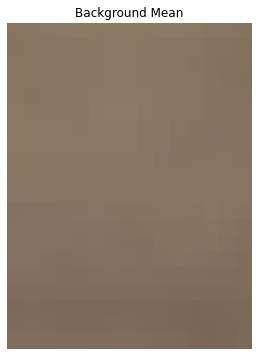

In [7]:
### Calculate the mean for background class
bgMean = np.zeros((nDim, 1)) # 900 x 1 matrix for mean of background class
bgImgCount = 0 # count the number of background images

# loop the images in training background folder
for iFile in trainingBackgroundImages:
    ### Load the training backgrounds
    bgImgCount += 1
    bgImg = cv2.imread(trainBackground+'/'+str(iFile))
    nbrows, nbcols = bgImg.shape[0], bgImg.shape[1]
    for i in range(nbrows):
        for j in range(nbcols):
            # get the BGR values (Opencv) of each pixel of this image
            B = bgImg[i][j][0]
            G = bgImg[i][j][1] 
            R = bgImg[i][j][2]
            
            # store the values in order of RGB in background mean array
            bgMean[(i*nbcols)+j][0] += R
            bgMean[(i*nbcols)+j+(nbrows*nbcols)][0] += G
            bgMean[(i*nbcols)+j+(2*nbrows*nbcols)][0] += B

# divide by number of face image to get the mean
for i in range(nDim):
    bgMean[i][0] /= bgImgCount

# Uncomment to print the background mean array
# print(bgMean)


# Convert the background mean array into BGR array for visualization
sample3 = np.zeros((nbrows, nbcols, 3))
for i in range(nfrows):
        for j in range(nfcols):
            sample3[i][j][0] = int(bgMean[(i*nfcols)+j+(2*nfrows*nfcols)][0])
            sample3[i][j][1] = int(bgMean[(i*nfcols)+j+(nfrows*nfcols)][0])
            sample3[i][j][2] = int(bgMean[(i*nfcols)+j][0])

# visualize the background mean
sample3=sample3.astype(np.uint8)
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(sample3, cv2.COLOR_BGR2RGB))
plt.title('Background Mean')
plt.axis("off")

(-0.5, 14.5, 19.5, -0.5)

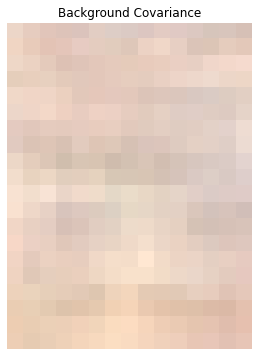

In [8]:
### Calculate the sigma for background class
bgSigma = np.zeros((nDim, nDim)) # 900 x 900 matrix Sigma of background class
bgImgCount = 0 # count number of face images

# loop the images in training background folder
for iFile in trainingBackgroundImages:
    ### Load the training backgrounds
    bgImgCount += 1
    bgImg = cv2.imread(trainBackground+'/'+str(iFile))
    nbrows, nbcols = bgImg.shape[0], bgImg.shape[1]
    temp = np.zeros((nDim, 1))
    for i in range(nbrows):
        for j in range(nbcols):
            # get the BGR values (Opencv) of each pixel of this image
            B = bgImg[i][j][0]
            G = bgImg[i][j][1] 
            R = bgImg[i][j][2]
            
            # store "x_i - u" in a temporary array 
            temp[(i*nbcols)+j][0] = R - bgMean[(i*nbcols)+j][0]
            temp[(i*nbcols)+j+(nbrows*nbcols)][0] = G - bgMean[(i*nbcols)+j+(nbrows*nbcols)][0]
            temp[(i*nbcols)+j+(2*nbrows*nbcols)][0] = B - bgMean[(i*nbcols)+j+(2*nbrows*nbcols)][0]
            
    # adding sum of (x_i - u)^2 into the face Sigma array 
    for d in range(nDim):
        bgSigma[d][d] += temp[d][0] * temp[d][0]
        
# divide by the number of background image to get the covariance
for d in range(nDim):
        bgSigma[d][d] /= bgImgCount

# Uncomment to print background Sigma array
# print( bgSigma )

# convert background sigma into BGR matrix for visualization
bg_max = 0
sample4 = np.zeros((nfrows, nfcols, 3))
for i in range(nfrows):
        for j in range(nfcols):
            sample4[i][j][0] = int(bgSigma[(i*nfcols)+j+(2*nfrows*nfcols)][(i*nfcols)+j+(2*nfrows*nfcols)]) 
            sample4[i][j][1] = int(bgSigma[(i*nfcols)+j+(nfrows*nfcols)][(i*nfcols)+j+(nfrows*nfcols)]) 
            sample4[i][j][2] = int(bgSigma[(i*nfcols)+j][(i*nfcols)+j]) 
            temp_max = max(sample4[i][j][0], sample4[i][j][1], sample4[i][j][2])
            if(temp_max > bg_max):
                bg_max=temp_max

# change the scale of each value to [0-255]
for i in range(nfrows):
        for j in range(nfcols):
            sample4[i][j][0] = (sample4[i][j][0] / bg_max) *255 
            sample4[i][j][1] = (sample4[i][j][1] / bg_max) *255 
            sample4[i][j][2] = (sample4[i][j][2] / bg_max) *255 
            
# visualize the background Sigma
sample4=sample4.astype(np.uint8)
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(sample4, cv2.COLOR_BGR2RGB))
plt.title('Background Covariance')
plt.axis("off")

In [9]:
### Testing Face Classification
# faceMean, faceSigma, bgMean, bgSigma
# logNorm(x, mean, sigma, dim)
faceDetected = 0 # Number of Correctly Classified Faces Images
totalFaceTest = 0 # Total Number of Face Images
for iFile in testingFaceImages:
    # Load the testing faces
    testImg = cv2.imread(testFace+'/'+str(iFile))
    nrows, ncols = testImg.shape[0], testImg.shape[1]
    totalFaceTest += 1  
    # create a temp 900 x 1 array to store RGB for calling logNorm(x, mean, sigma, dim) function
    testMatrix = np.zeros((nDim, 1))
    for i in range(nrows):
        for j in range(ncols):
            B = testImg[i][j][0]
            G = testImg[i][j][1] 
            R = testImg[i][j][2]
            
            testMatrix [(i*ncols)+j][0] = R 
            testMatrix [(i*ncols)+j+(nrows*ncols)][0] = G 
            testMatrix [(i*ncols)+j+(2*nrows*ncols)][0] = B
    
    # classified as face if Norm_x[u_face, Sigma_face] is greater than Norm_x[u_bg, Sigma_bg]
    if logNorm(testMatrix, faceMean, faceSigma, nDim) > logNorm(testMatrix, bgMean, bgSigma, nDim):
        faceDetected += 1

# Calculate Accuracy of Face Classification
faceAccuracy = faceDetected / totalFaceTest

print("Number of Correctly Classified Faces Images: "+ str(faceDetected))
print("Total Number of Face Images: " + str(totalFaceTest))
print("Accuracy of Face Classification: "+str(faceAccuracy))

Number of Correctly Classified Faces Images: 191
Total Number of Face Images: 232
Accuracy of Face Classification: 0.8232758620689655


In [10]:
### Testing Background Classification
# faceMean, faceSigma, bgMean, bgSigma
# logNorm(x, mean, sigma, dim)
backgroundDetected = 0 # Number of Correctly Classified Background Images
totalBackgroundTest = 0 # Total Number of Face Images
for iFile in testingBackgroundImages:
    # Load the testing faces
    testImg = cv2.imread(testBackground+'/'+str(iFile))
    nrows, ncols = testImg.shape[0], testImg.shape[1]
    totalBackgroundTest += 1 
    # create a temp 900 x 1 array to store RGB for calling logNorm(x, mean, sigma, dim) function
    testMatrix = np.zeros((nDim, 1))
    for i in range(nrows):
        for j in range(ncols):
            B = testImg[i][j][0]
            G = testImg[i][j][1] 
            R = testImg[i][j][2]
            
            testMatrix [(i*ncols)+j][0] = R 
            testMatrix [(i*ncols)+j+(nrows*ncols)][0] = G 
            testMatrix [(i*ncols)+j+(2*nrows*ncols)][0] = B   
            
    # classified as background if Norm_x[u_bg, Sigma_bg] is greater than Norm_x[u_face, Sigma_face]        
    if logNorm(testMatrix, bgMean, bgSigma, nDim) > logNorm(testMatrix, faceMean, faceSigma, nDim):
        backgroundDetected += 1

# Calculate Accuracy of Background Classification
backgroundAccuracy = backgroundDetected / totalBackgroundTest
print("Number of Correctly Classified Background Images: "+ str(backgroundDetected))
print("Total Number of Background Images: " + str(totalBackgroundTest))
print("Accuracy of Background Classification: "+str(backgroundAccuracy))

Number of Correctly Classified Background Images: 421
Total Number of Background Images: 564
Accuracy of Background Classification: 0.7464539007092199
